In [40]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

***Preprocessing Phase*** 

Downloading Tesla stock data 

In [41]:
tesla = yf.download('TSLA',start = "2019-11-18",end="2020-06-10")

[*********************100%%**********************]  1 of 1 completed


In [42]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-18,23.528000,23.543333,23.073334,23.332666,23.332666,66006000
2019-11-19,23.450001,23.999332,23.186666,23.968000,23.968000,115872000
2019-11-20,24.000000,24.080000,23.304667,23.481333,23.481333,100876500
2019-11-21,23.634001,24.056000,23.600000,23.655333,23.655333,91650000
2019-11-22,22.677334,22.733334,22.000000,22.202667,22.202667,253059000
...,...,...,...,...,...,...
2020-06-03,59.208000,59.862667,58.673332,58.863998,58.863998,119242500
2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500
2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500


In [43]:
tesla.to_csv("data.csv")

In [44]:
df = pd.read_csv('data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-18,23.528000,23.543333,23.073334,23.332666,23.332666,66006000
1,2019-11-19,23.450001,23.999332,23.186666,23.968000,23.968000,115872000
2,2019-11-20,24.000000,24.080000,23.304667,23.481333,23.481333,100876500
3,2019-11-21,23.634001,24.056000,23.600000,23.655333,23.655333,91650000
4,2019-11-22,22.677334,22.733334,22.000000,22.202667,22.202667,253059000
...,...,...,...,...,...,...,...
135,2020-06-03,59.208000,59.862667,58.673332,58.863998,58.863998,119242500
136,2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500
137,2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500
138,2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500


In [45]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-18,2019-11-18,23.528000,23.543333,23.073334,23.332666,23.332666,66006000
2019-11-19,2019-11-19,23.450001,23.999332,23.186666,23.968000,23.968000,115872000
2019-11-20,2019-11-20,24.000000,24.080000,23.304667,23.481333,23.481333,100876500
2019-11-21,2019-11-21,23.634001,24.056000,23.600000,23.655333,23.655333,91650000
2019-11-22,2019-11-22,22.677334,22.733334,22.000000,22.202667,22.202667,253059000
...,...,...,...,...,...,...,...
2020-06-03,2020-06-03,59.208000,59.862667,58.673332,58.863998,58.863998,119242500
2020-06-04,2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500
2020-06-05,2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500
2020-06-08,2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500


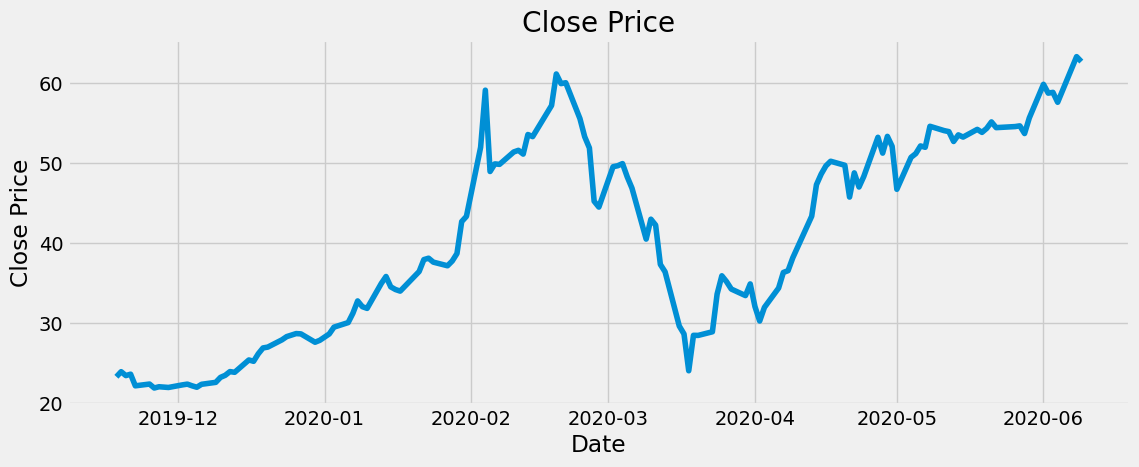

In [46]:
plt.figure(figsize=(12.2,4.5))
plt.title("Close Price")
plt.plot(df['Close'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

In [47]:
#Calculating sma,mma,lma 
def shortEma(data):
    return data['Close'].ewm(span=5, adjust=False).mean()

def middleEma(data):
    return data['Close'].ewm(span=21, adjust=False).mean()

def longEma(data):
    return data['Close'].ewm(span=63, adjust=False).mean()

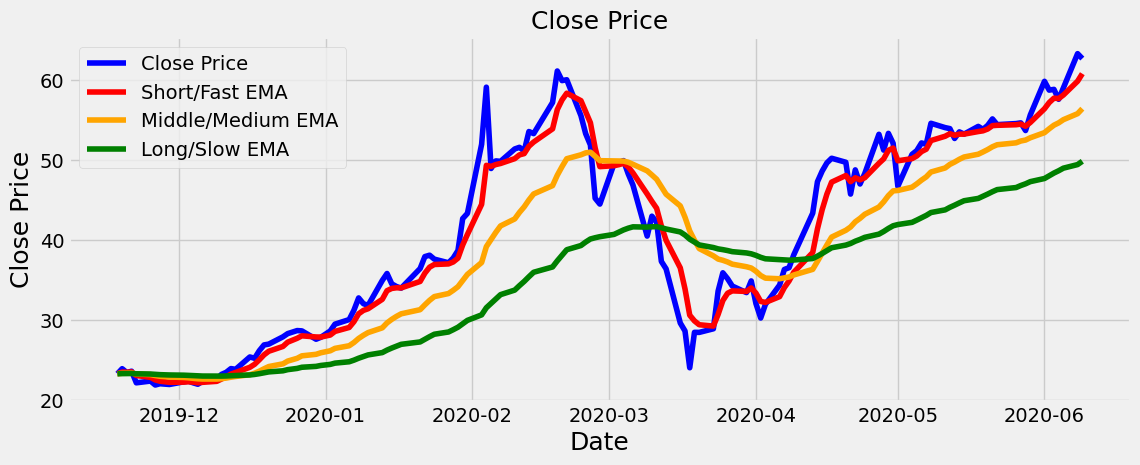

In [48]:
short_ema_values = shortEma(df)
medium_ema_values = middleEma(df)
long_ema_values = longEma(df)

# Visualize the closing price and exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(short_ema_values, label='Short/Fast EMA', color='red')
plt.plot(medium_ema_values, label='Middle/Medium EMA', color='orange')
plt.plot(long_ema_values, label='Long/Slow EMA', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()  
plt.show()

In [50]:
#Adding exponential moving averages to dataset
df['Short'],df['Middle'],df['Long'] = short_ema_values,medium_ema_values,long_ema_values
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-11-18,2019-11-18,23.528000,23.543333,23.073334,23.332666,23.332666,66006000,23.332666,23.332666,23.332666
2019-11-19,2019-11-19,23.450001,23.999332,23.186666,23.968000,23.968000,115872000,23.544444,23.390424,23.352521
2019-11-20,2019-11-20,24.000000,24.080000,23.304667,23.481333,23.481333,100876500,23.523407,23.398688,23.356546
2019-11-21,2019-11-21,23.634001,24.056000,23.600000,23.655333,23.655333,91650000,23.567382,23.422020,23.365883
2019-11-22,2019-11-22,22.677334,22.733334,22.000000,22.202667,22.202667,253059000,23.112477,23.311170,23.329533
...,...,...,...,...,...,...,...,...,...,...
2020-06-03,2020-06-03,59.208000,59.862667,58.673332,58.863998,58.863998,119242500,57.767047,54.389442,48.410454
2020-06-04,2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500,57.719809,54.683613,48.698419
2020-06-05,2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,58.161206,55.080012,49.021718
2020-06-08,2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500,59.883470,55.829829,49.468790


In [52]:
def buy_sell(df):
    buy,sell = [],[]
    flag_short,flag_long = False,False #indicates buy or sell position
    for i in range(0,len(df)):
        #buy:when mma crosses below lma and fma or sma crosses below the mma
        if df['Middle'][i] < df['Long'][i] and df['Short'][i] < df['Middle'][i] and flag_long == False and flag_short == False:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            flag_short = True
        elif flag_short == True and df['Short'][i] > df['Middle'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            flag_short = False  
        elif df['Middle'][i] > df['Long'][i] and df['Short'][i] > df['Middle'][i] and flag_long == False and flag_short == False:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            flag_long = True
        elif flag_long == True and df['Short'][i] < df['Middle'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            flag_long = False
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy,sell

In [53]:
df['Buy'] = buy_sell(df)[0]
df['Sell'] = buy_sell(df)[1]

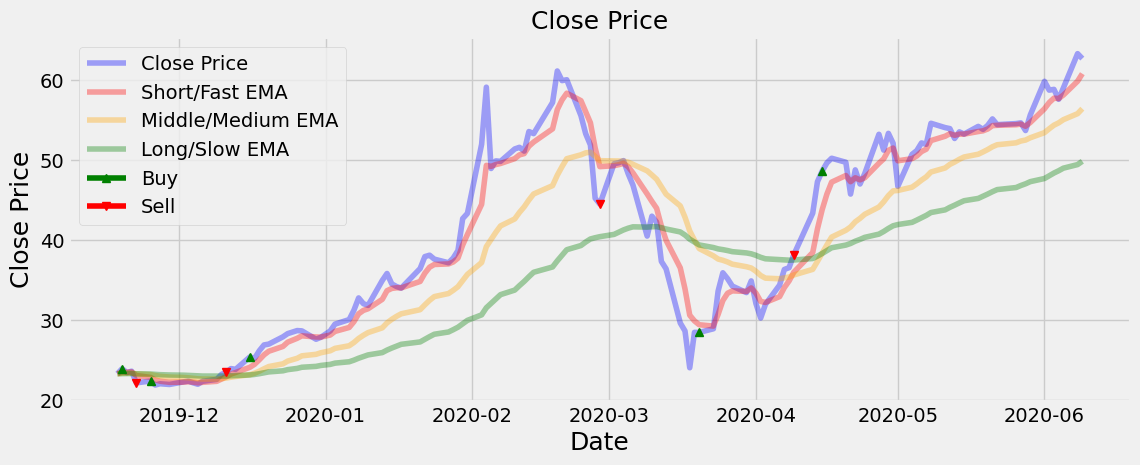

In [54]:
# Visualize the closing price and exponential moving averages and buy/sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue',alpha=0.35)
plt.plot(short_ema_values, label='Short/Fast EMA', color='red',alpha=0.35)
plt.plot(medium_ema_values, label='Middle/Medium EMA', color='orange',alpha=0.35)
plt.plot(long_ema_values, label='Long/Slow EMA', color='green',alpha=0.35)
plt.plot(df.index,df['Buy'],c='green',marker='^',label='Buy',alpha=1.0)
plt.plot(df.index,df['Sell'],c='red',marker='v',label='Sell',alpha=1.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()  
plt.show()